In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df=pd.read_csv(r"C:\Users\RIBBONS\Downloads\AcademicPerformance_New.csv")
df


,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [3]:
df.isnull().sum()

df['AI'].fillna(df['AI'].mean())

df['WT'].fillna(df['WT'].mode())

df.fillna(0)

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,0.0,53.000000,B,No
2,0.0,0,0.0,0.0,0.0,0.000000,0,0
3,4.0,China,47.0,0.0,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,0.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,0.0,0.0,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [5]:
numeric_cols = df.select_dtypes(include='number').columns
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outlier_condition, Q1, Q3
for col in numeric_cols:
    outliers, Q1, Q3 = detect_outliers_iqr(df[col])
    print(f"\nColumn: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}")
    print("Outliers found at:\n", df[col][outliers])
    df = df[~outliers]#keeps only non outlier rows


Column: Roll No
Q1: 26.25, Q3: 74.75
Outliers found at:
 Series([], Name: Roll No, dtype: float64)

Column: WT
Q1: 51.0, Q3: 71.0
Outliers found at:
 17    18.0
Name: WT, dtype: float64

Column: DSBDA
Q1: 55.0, Q3: 74.0
Outliers found at:
 76    26.0
Name: DSBDA, dtype: float64

Column: AI
Q1: 53.5, Q3: 74.0
Outliers found at:
 59    20.0
Name: AI, dtype: float64

Column: Average
Q1: 46.16666666665, Q3: 72.16666666665
Outliers found at:
 Series([], Name: Average, dtype: float64)


In [6]:
for col in numeric_cols:
    avg = df[col].mean()
    max_val = df[col].max()
    print(f"{col}-->Average is: {avg}")
    print(f"{col}-->Maximum value is: {max_val}")

Roll No-->Average is: 50.44210526315789
Roll No-->Maximum value is: 99.0
WT-->Average is: 61.90909090909091
WT-->Maximum value is: 97.0
DSBDA-->Average is: 65.58695652173913
DSBDA-->Maximum value is: 95.0
AI-->Average is: 63.593023255813954
AI-->Maximum value is: 92.0
Average-->Average is: 59.47719298244844
Average-->Maximum value is: 91.6666666667


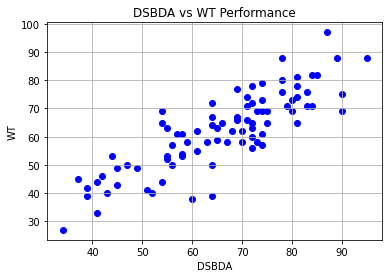

In [7]:
plt.scatter(df['DSBDA'], df['WT'], color='blue')
plt.xlabel("DSBDA")
plt.ylabel("WT")
plt.title("DSBDA vs WT Performance")
plt.grid(True)
plt.show()


Column: Roll No
Q1: 25.5, Q3: 74.5
Outliers found at:
 Series([], Name: Roll No, dtype: float64)

Column: WT
Q1: 53.0, Q3: 71.0
Outliers found at:
 17    18.0
Name: WT, dtype: float64

Column: DSBDA
Q1: 54.0, Q3: 74.0
Outliers found at:
 2     0.0
3     0.0
33    0.0
94    0.0
Name: DSBDA, dtype: float64

Column: AI
Q1: 54.25, Q3: 74.0
Outliers found at:
 59    20.0
76    22.0
Name: AI, dtype: float64

Column: Average
Q1: 46.3333333333, Q3: 72.41666666665
Outliers found at:
 Series([], Name: Average, dtype: float64)
Roll No --> Average is: 50.641304347826086
Roll No --> Maximum value is: 99.0
WT --> Average is: 62.66304347826087
WT --> Maximum value is: 97.0
DSBDA --> Average is: 65.58695652173913
DSBDA --> Maximum value is: 95.0
AI --> Average is: 63.96617000488518
AI --> Maximum value is: 92.0
Average --> Average is: 60.518115942021765
Average --> Maximum value is: 91.6666666667


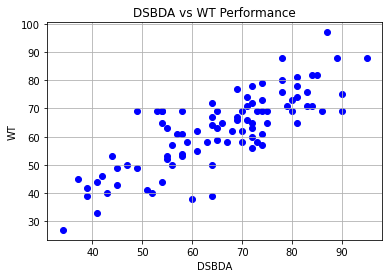

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset from the specified path
df = pd.read_csv(r"C:\Users\RIBBONS\Downloads\AcademicPerformance_New.csv")

# Display the entire DataFrame (only advisable for small datasets)
df

# Check for missing values in each column
df.isnull().sum()

# Fill missing values in 'AI' column with its mean value
df['AI'].fillna(df['AI'].mean(), inplace=True)

# Fill missing values in 'WT' column with its mode (most frequent value)
df['WT'].fillna(df['WT'].mode()[0], inplace=True)

# Fill any remaining missing values in the dataset with 0
df.fillna(0, inplace=True)

# Identify all numeric columns in the dataset
numeric_cols = df.select_dtypes(include='number').columns

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile
    Q3 = data.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1             # Interquartile range
    # Identify data points that are below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    outlier_condition = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outlier_condition, Q1, Q3

# Loop through each numeric column to detect and remove outliers
for col in numeric_cols:
    outliers, Q1, Q3 = detect_outliers_iqr(df[col])
    print(f"\nColumn: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}")
    print("Outliers found at:\n", df[col][outliers])
    # Remove rows with outliers in the current column
    df = df[~outliers]

# Apply aggregation functions (mean and max) and display results
for col in numeric_cols:
    avg = df[col].mean()
    max_val = df[col].max()
    print(f"{col} --> Average is: {avg}")
    print(f"{col} --> Maximum value is: {max_val}")

# Draw a scatter plot between DSBDA and WT columns to visualize the relationship
plt.scatter(df['DSBDA'], df['WT'], color='blue')
plt.xlabel("DSBDA")
plt.ylabel("WT")
plt.title("DSBDA vs WT Performance")
plt.grid(True)
plt.show()
